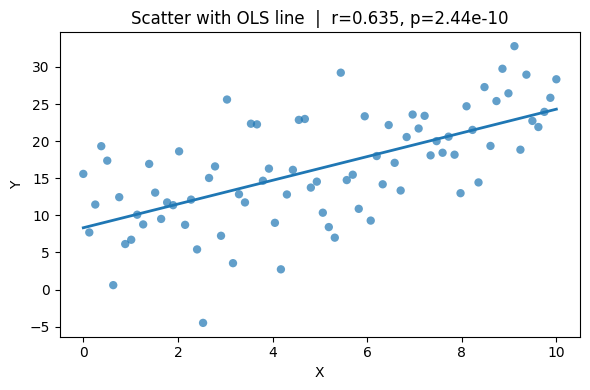

In [1]:
import numpy as np, matplotlib.pyplot as plt
from scipy.stats import pearsonr

np.random.seed(0)
x = np.linspace(0, 10, 80)
y = 2.3 * x + 5 + np.random.normal(scale=6, size=len(x))

r, p = pearsonr(x, y)

plt.figure(figsize=(6,4))
plt.scatter(x, y, alpha=0.7, edgecolors='none')
# 回归线（最小二乘）
coef = np.polyfit(x, y, 1)
yy = np.polyval(coef, x)
plt.plot(x, yy, lw=2)
plt.title(f"Scatter with OLS line  |  r={r:.3f}, p={p:.2e}")
plt.xlabel("X")
plt.ylabel("Y")
plt.tight_layout()
plt.show()


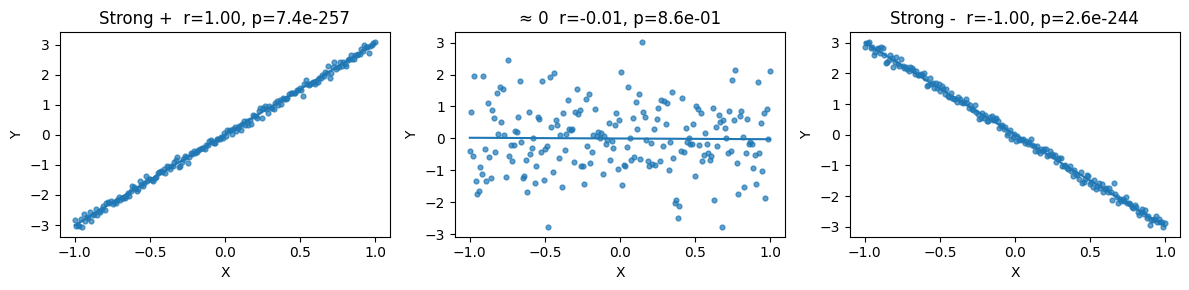

In [2]:
import numpy as np, matplotlib.pyplot as plt
from scipy.stats import pearsonr

np.random.seed(1)
n = 200
x = np.linspace(-1, 1, n)

y_pos = 3*x + np.random.normal(0, 0.1, n)   # 强正相关
y_no  = np.random.normal(0, 1, n)           # 近似无关
y_neg = -3*x + np.random.normal(0, 0.1, n)  # 强负相关

fig, axes = plt.subplots(1,3,figsize=(12,3))
for ax, y, title in zip(
    axes, 
    [y_pos, y_no, y_neg], 
    ["Strong +", "≈ 0", "Strong -"]
):
    r, p = pearsonr(x, y)
    ax.scatter(x, y, s=12, alpha=0.7)
    m, b = np.polyfit(x, y, 1)
    ax.plot(x, m*x + b)
    ax.set_title(f"{title}  r={r:.2f}, p={p:.1e}")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
plt.tight_layout()
plt.show()


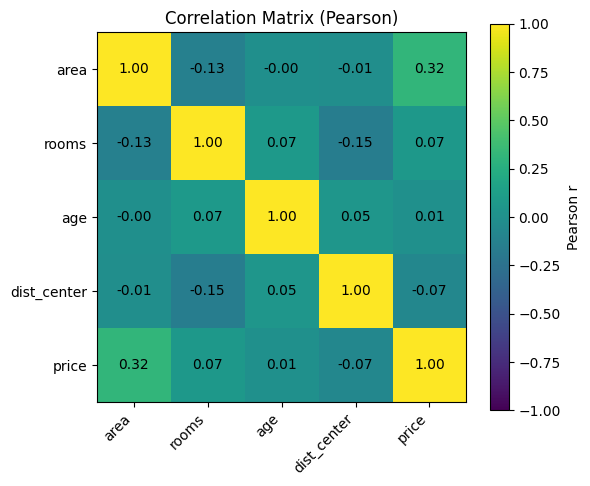

In [3]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt

np.random.seed(2)
N = 300
df = pd.DataFrame({
    "area": np.random.normal(120, 25, N),
    "rooms": np.random.normal(3, 0.8, N),
    "age": np.random.exponential(20, N),
    "dist_center": np.random.gamma(2, 3, N),
})
# 构造一个与 area 强相关的价格
df["price"] = 1500 + 80*df["area"] + np.random.normal(0, 5000, N)

corr = df.corr(numeric_only=True)

plt.figure(figsize=(6,5))
plt.imshow(corr, vmin=-1, vmax=1)
plt.colorbar(label="Pearson r")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right')
plt.yticks(range(len(corr.columns)), corr.columns)
# 在格子中标数值
for i in range(len(corr)):
    for j in range(len(corr)):
        plt.text(j, i, f"{corr.values[i,j]:.2f}", ha='center', va='center')
plt.title("Correlation Matrix (Pearson)")
plt.tight_layout()
plt.show()


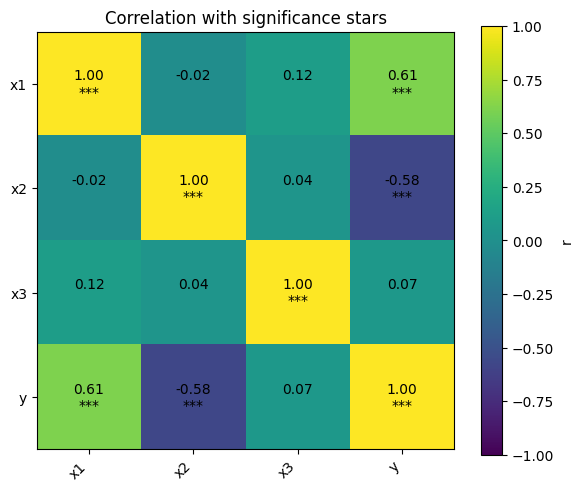

In [4]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from scipy.stats import pearsonr

def corr_with_pvals(df):
    cols = df.columns
    rmat = pd.DataFrame(np.zeros((len(cols), len(cols))), index=cols, columns=cols)
    pmat = pd.DataFrame(np.zeros((len(cols), len(cols))), index=cols, columns=cols)
    for i, a in enumerate(cols):
        for j, b in enumerate(cols):
            r, p = pearsonr(df[a], df[b])
            rmat.iloc[i,j] = r
            pmat.iloc[i,j] = p
    return rmat, pmat

np.random.seed(3)
df = pd.DataFrame({
    "x1": np.random.normal(size=200),
    "x2": np.random.normal(size=200),
    "x3": np.random.normal(size=200),
})
df["y"] = 0.6*df["x1"] - 0.5*df["x2"] + np.random.normal(scale=0.6, size=len(df))

R, P = corr_with_pvals(df)

plt.figure(figsize=(6,5))
plt.imshow(R, vmin=-1, vmax=1)
plt.colorbar(label="r")
plt.xticks(range(len(R.columns)), R.columns, rotation=45, ha='right')
plt.yticks(range(len(R.index)), R.index)

def stars(p):
    return "***" if p<0.001 else "**" if p<0.01 else "*" if p<0.05 else ""

for i in range(len(R)):
    for j in range(len(R)):
        s = stars(P.values[i,j])
        plt.text(j, i, f"{R.values[i,j]:.2f}\n{s}", ha='center', va='center')

plt.title("Correlation with significance stars")
plt.tight_layout()
plt.show()


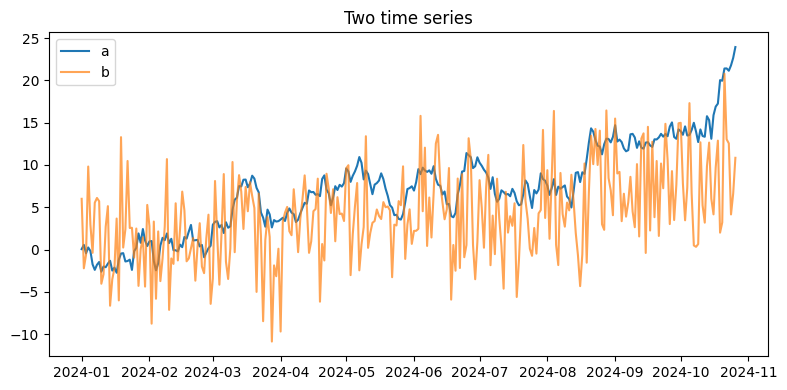

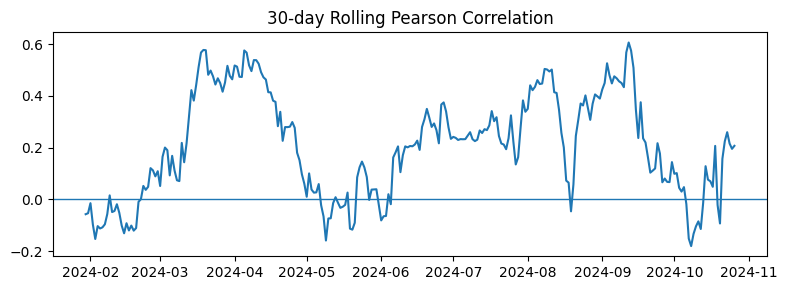

In [5]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt

np.random.seed(4)
t = pd.date_range("2024-01-01", periods=300, freq="D")
a = np.cumsum(np.random.normal(0, 1, len(t)))   # 累计随机游走
b = a * 0.5 + np.random.normal(0, 5, len(t))   # 带噪的相关序列

df = pd.DataFrame({"a": a, "b": b}, index=t)
roll_r = df["a"].rolling(window=30).corr(df["b"])

plt.figure(figsize=(8,4))
plt.plot(df.index, df["a"], label="a")
plt.plot(df.index, df["b"], label="b", alpha=0.7)
plt.legend()
plt.title("Two time series")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,3))
plt.plot(roll_r.index, roll_r)
plt.axhline(0, lw=1)
plt.title("30-day Rolling Pearson Correlation")
plt.tight_layout()
plt.show()


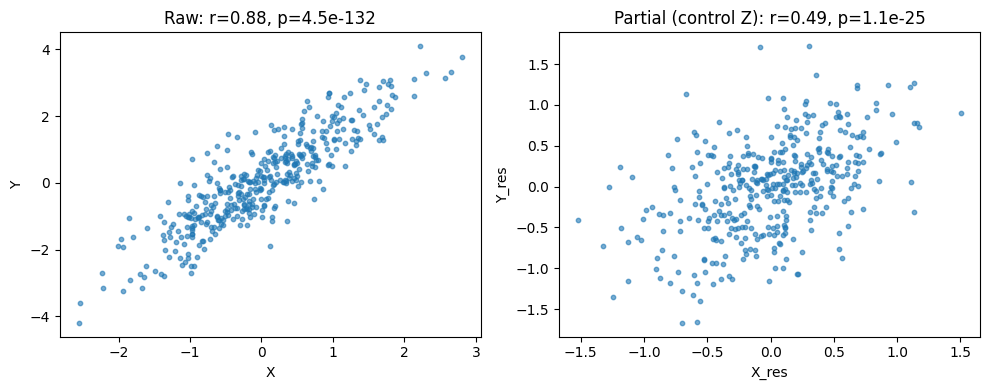

In [ ]:
# 偏相关（控制变量 Z 后 X 与 Y 的线性关系）
import numpy as np, matplotlib.pyplot as plt
from scipy.stats import pearsonr

np.random.seed(5)
n = 400
Z = np.random.normal(size=n)
X = 0.8*Z + np.random.normal(scale=0.5, size=n)
Y = 0.8*Z + 0.6*X + np.random.normal(scale=0.5, size=n)  # X 与 Y 正相关，但都受 Z 影响

# 残差提取函数（简单一元线性回归）
def residual(u, v):
    a, b = np.polyfit(v, u, 1)
    return u - (a*v + b)

X_res = residual(X, Z)
Y_res = residual(Y, Z)

r_raw, p_raw = pearsonr(X, Y)
r_pc, p_pc = pearsonr(X_res, Y_res)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(X, Y, s=10, alpha=0.6)
plt.title(f"Raw: r={r_raw:.2f}, p={p_raw:.1e}")
plt.xlabel("X"); plt.ylabel("Y")

plt.subplot(1,2,2)
plt.scatter(X_res, Y_res, s=10, alpha=0.6)
plt.title(f"Partial (control Z): r={r_pc:.2f}, p={p_pc:.1e}")
plt.xlabel("X_res"); plt.ylabel("Y_res")

plt.tight_layout()
plt.show()


In [7]:
import numpy as np
from scipy.stats import pearsonr, norm

np.random.seed(6)
x = np.random.normal(size=120)
y = 0.5*x + np.random.normal(scale=0.8, size=120)

r, p = pearsonr(x, y)
n = len(x)
# Fisher z
z = np.arctanh(r)
se = 1/np.sqrt(n-3)
z_lo, z_hi = z + norm.ppf(0.025)*se, z + norm.ppf(0.975)*se
r_lo, r_hi = np.tanh([z_lo, z_hi])
print(f"r = {r:.3f}, 95% CI = [{r_lo:.3f}, {r_hi:.3f}], p = {p:.2e}")


r = 0.583, 95% CI = [0.451, 0.690], p = 2.88e-12


In [8]:
import numpy as np
from scipy.stats import pearsonr

np.random.seed(7)
x = np.random.normal(size=150)
y = 0.4*x + np.random.normal(scale=1.0, size=150)

r_obs, _ = pearsonr(x, y)

B = 5000
cnt = 0
for _ in range(B):
    y_perm = np.random.permutation(y)
    r_perm, _ = pearsonr(x, y_perm)
    if abs(r_perm) >= abs(r_obs):
        cnt += 1
p_perm = (cnt + 1) / (B + 1)  # 加1修正

print(f"Observed r = {r_obs:.3f}, permutation p ≈ {p_perm:.4f}  (B={B})")


Observed r = 0.354, permutation p ≈ 0.0002  (B=5000)


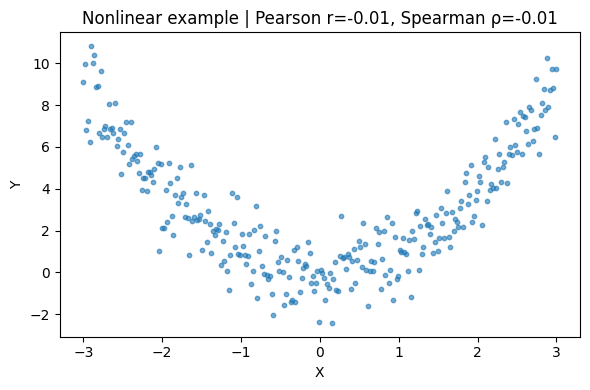

In [ ]:
# 非线性关系对比：Pearson vs Spearman（提醒误判风险）
import numpy as np, matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

np.random.seed(8)
x = np.linspace(-3, 3, 300)
y = x**2 + np.random.normal(scale=1.0, size=len(x))  # 抛物线：非线性但有单调片段

r_p, p_p = pearsonr(x, y)
r_s, p_s = spearmanr(x, y)

plt.figure(figsize=(6,4))
plt.scatter(x, y, s=10, alpha=0.6)
plt.title(f"Nonlinear example | Pearson r={r_p:.2f}, Spearman ρ={r_s:.2f}")
plt.xlabel("X"); plt.ylabel("Y")
plt.tight_layout()
plt.show()
